In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np 
import pandas as pd
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Reshape,LeakyReLU, Dropout
import tensorflow as tf
from tensorflow.keras.layers import AveragePooling2D,UpSampling2D
from tensorflow import keras

In [21]:
ab = np.load('/content/drive/My Drive/coursera image colorization/colorization data/ab1.npy')
gray = np.load('/content/drive/My Drive/coursera image colorization/colorization data/gray_scale.npy')

In [6]:
def batch_prep(gray_img, batch_size = 100):
    img = np.zeros((batch_size, 224, 224, 3))
    for i in range(0, 3):
        img[:batch_size, :, :,i] = gray_img[:batch_size]
    return img

img_in = batch_prep(gray, batch_size = 300)

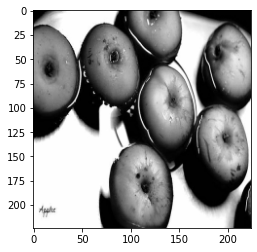

In [7]:
plt.imshow(gray[29], cmap=plt.cm.gray)

In [8]:
img_in.shape

(300, 224, 224, 3)

In [9]:
#define the function
def get_rbg(gray_imgs, ab_imgs, n = 10):
    
    #create an empty array to store images
    img1 = np.zeros((n, 224, 224, 3))
    
    img1[:, :, :, 0] = gray_imgs[0:n:]
    img1[:, :, :, 1:] = ab_imgs[0:n:]
    
    #convert all the images to type unit8
    img1 = img1.astype("uint8")
    
    #create a new empty array
    imgs= []
    
    for i in range(0, n):
        imgs.append(cv2.cvtColor(img1[i], cv2.COLOR_LAB2RGB))
        
    #convert the image matrix into a numpy array
    imgs = np.array(imgs)
    
    return imgs

In [10]:
#preprocess the input to 
img_out = get_rbg(gray_imgs = gray, ab_imgs = ab, n = 300)

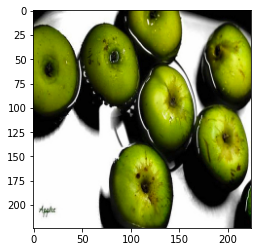

In [11]:
#display the original image
plt.imshow(img_out[29])

In [13]:
model = Sequential()

model.add(Conv2D(strides = 1, kernel_size = 3, filters = 12,use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05),padding = "valid", activation = tf.nn.relu))
model.add(Conv2DTranspose(strides = 1, kernel_size = 3, filters = 12,use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05), padding = "valid", activation = tf.nn.relu))
model.add(LeakyReLU(0.6))
model.add(Dropout(0.4))

model.add(Conv2D(strides = 1, kernel_size = 3, filters = 12,use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05), padding = "valid", activation = tf.nn.relu))
model.add(Conv2DTranspose(strides = 1, kernel_size = 3, filters = 3,use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05), padding = "valid", activation = tf.nn.relu))
model.add(LeakyReLU(0.6))
model.add(Dropout(0.4))

model.add(Conv2D(strides = 1, kernel_size = 3, filters = 12,use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05), padding = "valid", activation = tf.nn.relu))
model.add(Conv2DTranspose(strides = 1, kernel_size = 3, filters = 3,use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05), padding = "valid", activation = tf.nn.relu))
model.add(LeakyReLU(0.6))
model.add(Dropout(0.4))

model.add(Conv2D(strides = 1, kernel_size = 3, filters = 12 ,use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05), padding = "valid", activation = tf.nn.relu))
model.add(Conv2DTranspose(strides = 1, kernel_size = 3, filters = 3,use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05), padding = "valid", activation = tf.nn.relu))
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(UpSampling2D((2, 2)))
model.add(LeakyReLU(0.6))
model.add(Dropout(0.4))

model.add(Conv2D(strides = 1, kernel_size = 3, filters = 12,use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05), padding = "valid", activation = tf.nn.relu))
model.add(Conv2DTranspose(strides = 1, kernel_size = 3, filters = 3,use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05), padding = "valid", activation = tf.nn.relu))
model.add(LeakyReLU(0.6))
model.add(Dropout(0.4))



In [14]:
#Compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(),loss = 'mape',metrics=tf.keras.metrics.Accuracy())

In [ ]:
#fit the model using input and output images
model.fit(img_in, img_out, epochs =100, batch_size = 16)

In [16]:
#predict for all images using the model
prediction = model.predict(img_in)

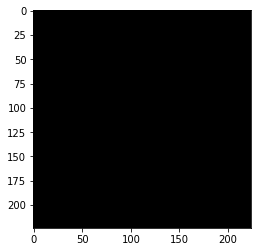

In [18]:
#display the predicted image
plt.imshow(prediction[29].astype('uint8'))

In [ ]:
model.save('model.h5')

In [23]:
model2 = keras.models.load_model('modelfinal.h5')

In [25]:
prediction = model2.predict(img_in)

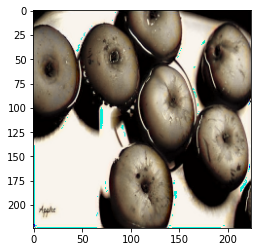

In [28]:
plt.imshow(prediction[29].astype('uint8'))